
## **Blur Filter**


El filtro se utiliza para reducir el ruido y los detalles de la imagen promediando los píxeles bajo un núcleo o kernel. El parámetro principal de este filtro es el tamaño del kernel, que afecta el grado de desenfoque. Un kernel más grande resultará en una imagen más suave, ya que se promedian más píxeles juntos.

**Prueba 1: Kernel Pequeño**
- Tamaño del kernel: (5, 5)

**Prueba 2: Kernel Grande**
- Tamaño del kernel: (25, 25)


**Importancia del Kernel**

El kernel en el procesamiento de imágenes actúa como una ventana deslizante de coeficientes que se aplica sobre la imagen original. Este proceso de convolución es fundamental para alterar las características visuales de la imagen, como enfocar, desenfocar o detectar bordes. La elección del tamaño y forma del kernel afecta directamente a los resultados del filtro aplicado.



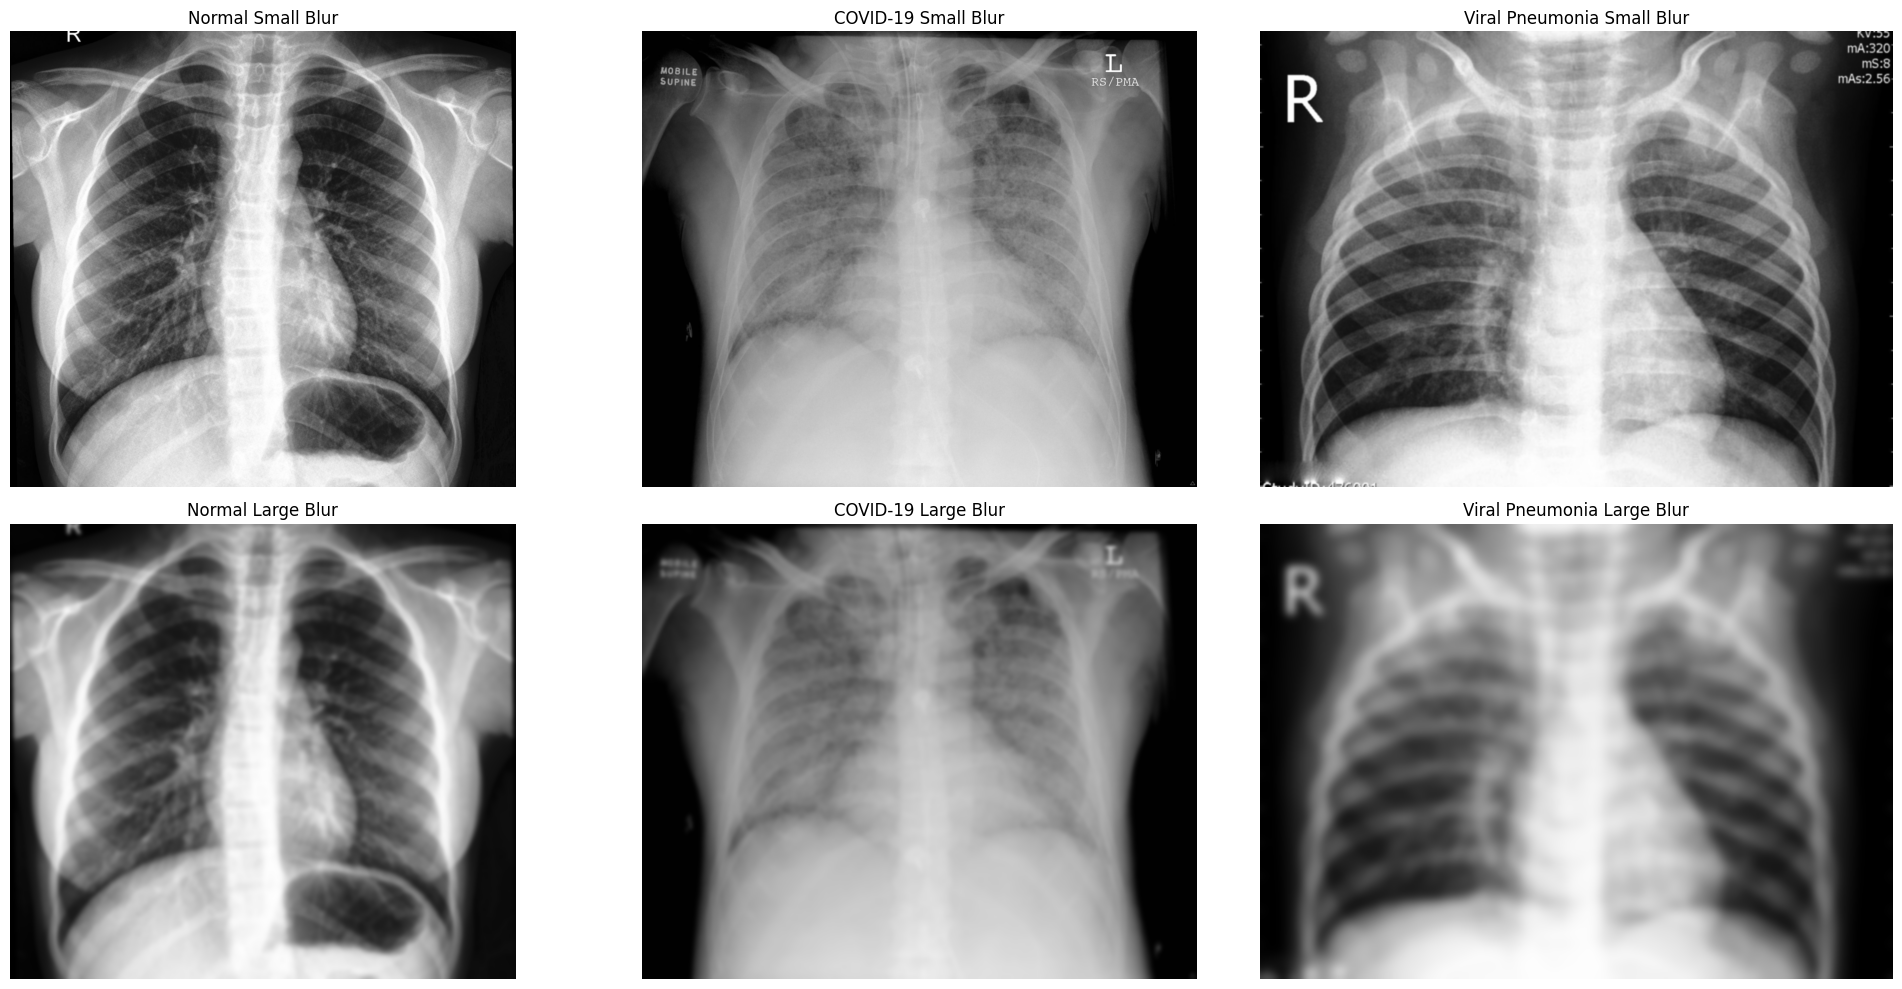

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load images
imgCovid = cv.imread("img/covid_selected.jpg", cv.IMREAD_COLOR)
imgHealthy = cv.imread("img/normal_selected.jpeg", cv.IMREAD_COLOR)
imgViralPneumonia = cv.imread("img/viral_selected.jpeg", cv.IMREAD_COLOR)

# Test 1: Small Kernel
imgCovidBlurSmall = cv.GaussianBlur(imgCovid, (5, 5), 0)
imgHealthyBlurSmall = cv.GaussianBlur(imgHealthy, (5, 5), 0)
imgViralPneumoniaBlurSmall = cv.GaussianBlur(imgViralPneumonia, (5, 5), 0)

# Test 2: Large Kernel
imgCovidBlurLarge = cv.GaussianBlur(imgCovid, (55, 55), 0)
imgHealthyBlurLarge = cv.GaussianBlur(imgHealthy, (55, 55), 0)
imgViralPneumoniaBlurLarge = cv.GaussianBlur(imgViralPneumonia, (55, 55), 0)

# Display images
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(imgHealthyBlurSmall)
plt.title("Normal Small Blur")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(imgCovidBlurSmall)
plt.title("COVID-19 Small Blur")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(imgViralPneumoniaBlurSmall)
plt.title("Viral Pneumonia Small Blur")
plt.axis("off")

# Fila 2, Orden: Normal, COVID, Viral
plt.subplot(2, 3, 4)
plt.imshow(imgHealthyBlurLarge)
plt.title("Normal Large Blur")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(imgCovidBlurLarge)
plt.title("COVID-19 Large Blur")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(imgViralPneumoniaBlurLarge)
plt.title("Viral Pneumonia Large Blur")
plt.axis("off")

plt.tight_layout()
plt.show()



## **Detección de Bordes con el Filtro Sobel**

### Explicación
La detección de bordes con el filtro Sobel es una técnica popular en el procesamiento de imágenes utilizada para detectar los bordes en una imagen. Funciona calculando el gradiente de la intensidad de la imagen en cada píxel, lo que resalta las regiones con alta frecuencia espacial correspondientes a los bordes. Típicamente, este método implica convolucionar la imagen con dos núcleos separados (uno para cambios horizontales y otro para cambios verticales) para calcular los gradientes en ambas direcciones.

**Prueba 1: Núcleo Pequeño**
- Tamaño del kernel: 5x5

**Prueba 2: Núcleo Grande**
- Tamaño del kernel: 7x7, usando como transformador de color, la imagen `BlurLarge`

### Importancia del Tamaño del Kernel

El tamaño del kernel en la detección de bordes Sobel tiene un impacto significativo en la sensibilidad del proceso de detección de bordes. Los kernels más pequeños detectarán bordes más finos y son más sensibles al ruido, mientras que los kernels más grandes son mejores para detectar bordes significativos pero pueden perder detalles más finos. La elección del tamaño del kernel depende de los requisitos específicos de la aplicación y de la naturaleza de las imágenes procesadas.


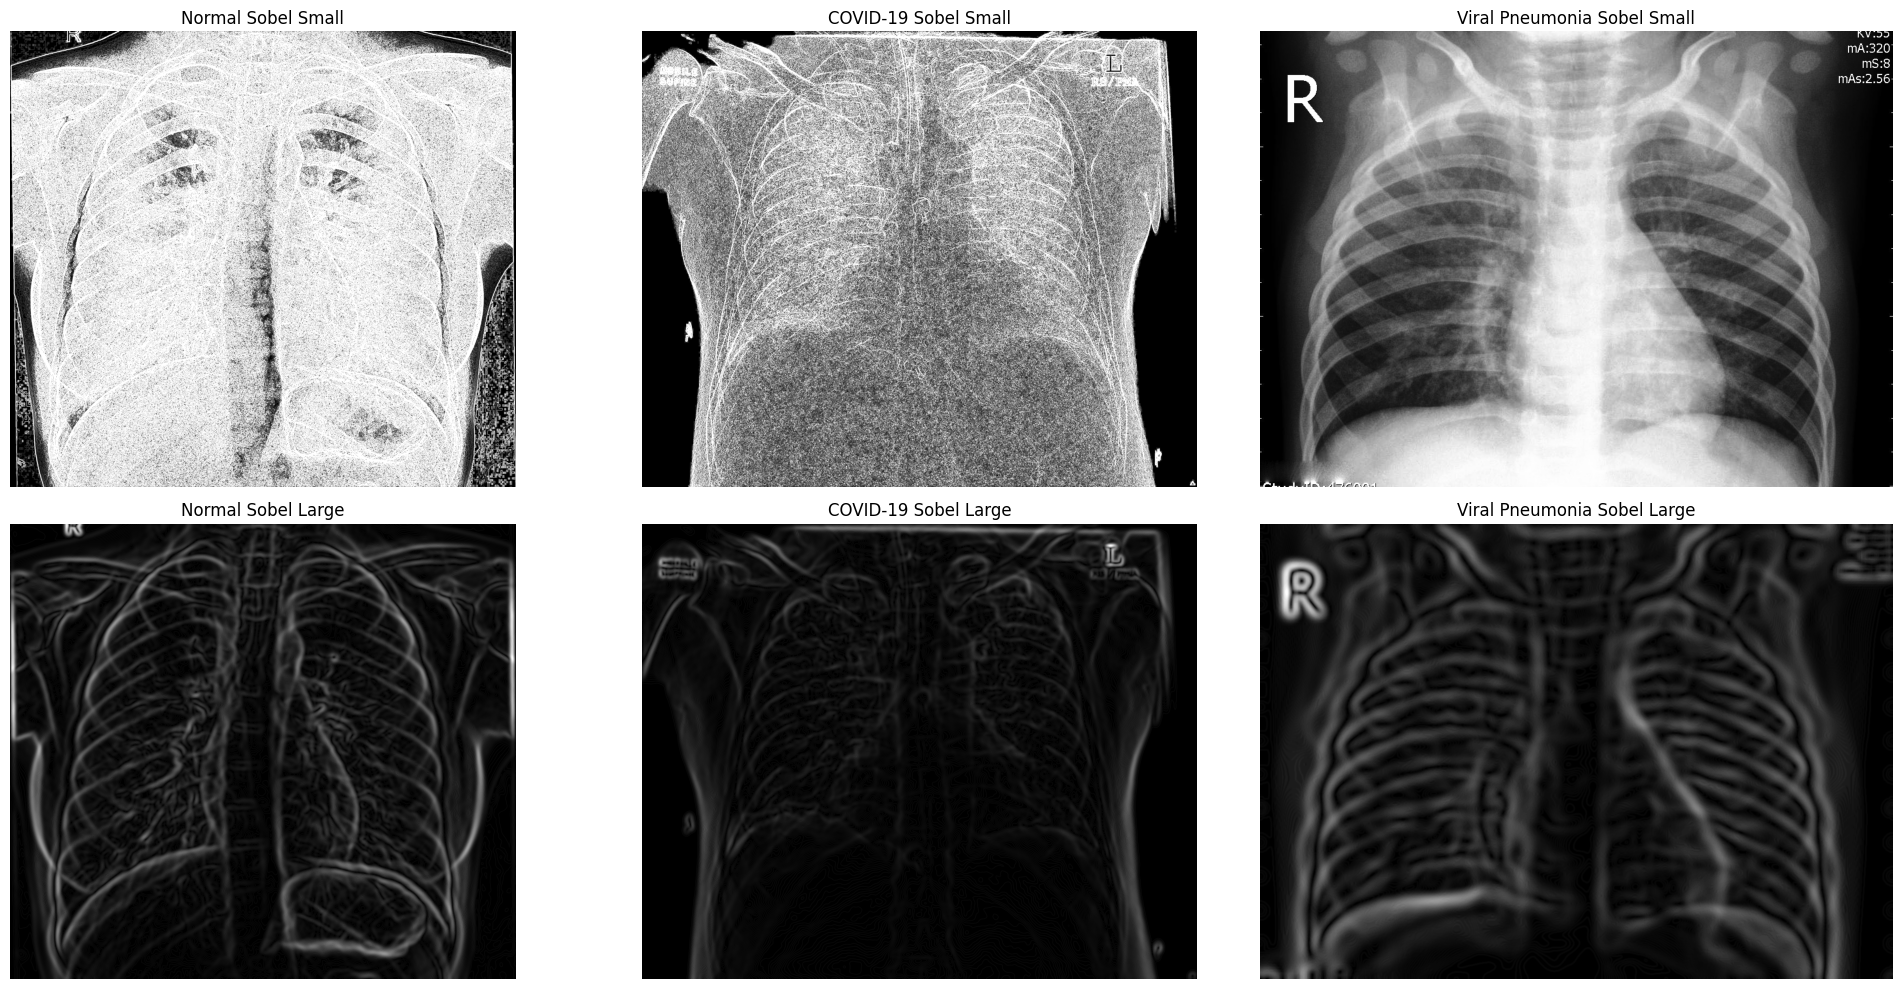

In [8]:

# Convert images to grayscale
imgCovidGray = cv.cvtColor(imgCovid, cv.COLOR_BGR2GRAY)
imgHealthyGray = cv.cvtColor(imgHealthy, cv.COLOR_BGR2GRAY)
imgViralPneumoniaGray = cv.cvtColor(imgViralPneumonia, cv.COLOR_BGR2GRAY)

# Test 1: Smaller Kernel
imgCovidSobelXSmall = cv.Sobel(imgCovidGray, cv.CV_64F, 1, 0, ksize=5)
imgCovidSobelYSmall = cv.Sobel(imgCovidGray, cv.CV_64F, 0, 1, ksize=5)
imgCovidSobelSmall = cv.magnitude(imgCovidSobelXSmall, imgCovidSobelYSmall)
imgCovidSobelSmall = cv.convertScaleAbs(imgCovidSobelSmall)  # Convert to 8-bit

imgHealthySobelXSmall = cv.Sobel(imgHealthyGray, cv.CV_64F, 1, 0, ksize=5)
imgHealthySobelYSmall = cv.Sobel(imgHealthyGray, cv.CV_64F, 0, 1, ksize=5)
imgHealthySobelSmall = cv.magnitude(imgHealthySobelXSmall, imgHealthySobelYSmall)
imgHealthySobelSmall = cv.convertScaleAbs(imgHealthySobelSmall)  # Convert to 8-bit

imgViralPneumoniaSobelXSmall = cv.Sobel(imgViralPneumoniaGray, cv.CV_64F, 1, 0, ksize=5)
imgViralPneumoniaSobelYSmall = cv.Sobel(imgViralPneumoniaGray, cv.CV_64F, 0, 1, ksize=5)
imgViralPneumoniaSobelSmall = cv.magnitude(imgViralPneumoniaSobelXSmall, imgViralPneumoniaSobelYSmall)
imgViralPneumoniaSobelSmall = cv.convertScaleAbs(imgViralPneumonia)

imgCovidGray = cv.cvtColor(imgCovidBlurLarge, cv.COLOR_BGR2GRAY)
imgHealthyGray = cv.cvtColor(imgHealthyBlurLarge, cv.COLOR_BGR2GRAY)
imgViralPneumoniaGray = cv.cvtColor(imgViralPneumoniaBlurLarge, cv.COLOR_BGR2GRAY)

# Test 2: Larger Kernel
imgCovidSobelXLarge = cv.Sobel(imgCovidGray, cv.CV_64F, 1, 0, ksize=7)
imgCovidSobelYLarge = cv.Sobel(imgCovidGray, cv.CV_64F, 0, 1, ksize=7)
imgCovidSobelLarge = cv.magnitude(imgCovidSobelXLarge, imgCovidSobelYLarge)

imgHealthySobelXLarge = cv.Sobel(imgHealthyGray, cv.CV_64F, 1, 0, ksize=7)
imgHealthySobelYLarge = cv.Sobel(imgHealthyGray, cv.CV_64F, 0, 1, ksize=7)
imgHealthySobelLarge = cv.magnitude(imgHealthySobelXLarge, imgHealthySobelYLarge)

imgViralPneumoniaSobelXLarge = cv.Sobel(imgViralPneumoniaGray, cv.CV_64F, 1, 0, ksize=7)
imgViralPneumoniaSobelYLarge = cv.Sobel(imgViralPneumoniaGray, cv.CV_64F, 0, 1, ksize=7)
imgViralPneumoniaSobelLarge = cv.magnitude(imgViralPneumoniaSobelXLarge, imgViralPneumoniaSobelYLarge)

# Display images
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(imgHealthySobelSmall, cmap="gray")
plt.title("Normal Sobel Small")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(imgCovidSobelSmall, cmap="gray")
plt.title("COVID-19 Sobel Small")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(imgViralPneumoniaSobelSmall, cmap="gray")
plt.title("Viral Pneumonia Sobel Small")
plt.axis("off")

# Fila 2, Orden: Normal, COVID, Viral
plt.subplot(2, 3, 4)
plt.imshow(imgHealthySobelLarge, cmap="gray")
plt.title("Normal Sobel Large")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(imgCovidSobelLarge, cmap="gray")
plt.title("COVID-19 Sobel Large")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(imgViralPneumoniaSobelLarge, cmap="gray")
plt.title("Viral Pneumonia Sobel Large")
plt.axis("off")

plt.tight_layout()
plt.show()


### Transformación a Escala de Grises para Sobel Edge DEtection

La detección de bordes con el filtro Sobel se realiza típicamente en imágenes en escala de grises por varias razones fundamentales:

1. **Simplificación de la Información:** Las imágenes en color contienen múltiples canales (generalmente rojo, verde y azul). Cada canal puede tener variaciones en la intensidad que pueden interpretarse de manera diferente como bordes. Convertir una imagen a escala de grises reduce la imagen a un solo canal, simplificando así la cantidad de datos a procesar y centrando el análisis en las diferencias de intensidad, no de color.


### Diferencias en Resultados Usando Imágenes con y sin Desenfoque Gaussiano

Usar una imagen con el filtro de Desenfoque (`Blur`) aplicado antes de la conversión a escala de grises y la detección de bordes con Sobel da resultados muy diferentes en comparación con usar la imagen original por las siguientes razones:

1. **Reducción de Ruido y Detalles Finos:** Al aplicar un filtro de Blur con un kernel grande, se suavizan significativamente los detalles y el ruido en la imagen. Esto reduce la cantidad de bordes menores detectados por el filtro Sobel, ya que muchos de los cambios menores en la intensidad que el filtro podría haber detectado en la imagen original se homogeneizan.

2. **Bordes más Pronunciados y Menos Ruido:** El desenfoque previo ayuda a resaltar los bordes más grandes y significativos al eliminar las variaciones pequeñas y aleatorias de la intensidad. Esto puede ser útil en imágenes con alto ruido o cuando se desea enfocar en estructuras más grandes en la imagen en lugar de detalles finos.

## **Canny Edge Detection Filter**

### Explicación
El filtro de detección de bordes Canny es una técnica de procesamiento de imágenes ampliamente utilizada para detectar una amplia gama de bordes en imágenes. Este método es particularmente efectivo debido a su capacidad para detectar bordes con gran precisión y su resistencia al ruido. El filtro Canny realiza varias etapas para detectar bordes: reducción de ruido, cálculo del gradiente de la imagen, aplicación de supresión no máxima, y umbralización con histéresis.

### Importancia de los Parámetros

Los parámetros clave en el filtro de detección de bordes Canny son los umbrales inferior y superior para la umbralización con histéresis:

- **Umbral Inferior:** Este valor define el mínimo de intensidad de gradiente necesario para comenzar a considerar un píxel como un borde. Píxeles con un gradiente por debajo de este umbral son rechazados automáticamente.

- **Umbral Superior:** Este valor define el máximo de intensidad de gradiente que confirma definitivamente que un píxel es parte de un borde. Píxeles con un gradiente por encima de este umbral son aceptados como bordes.

La relación entre estos dos umbrales es crucial porque define la sensibilidad del filtro a los bordes continuos y su capacidad para discriminar contra el ruido y los bordes más débiles. Una configuración típica implica que el umbral superior sea aproximadamente 2 a 3 veces el umbral inferior.


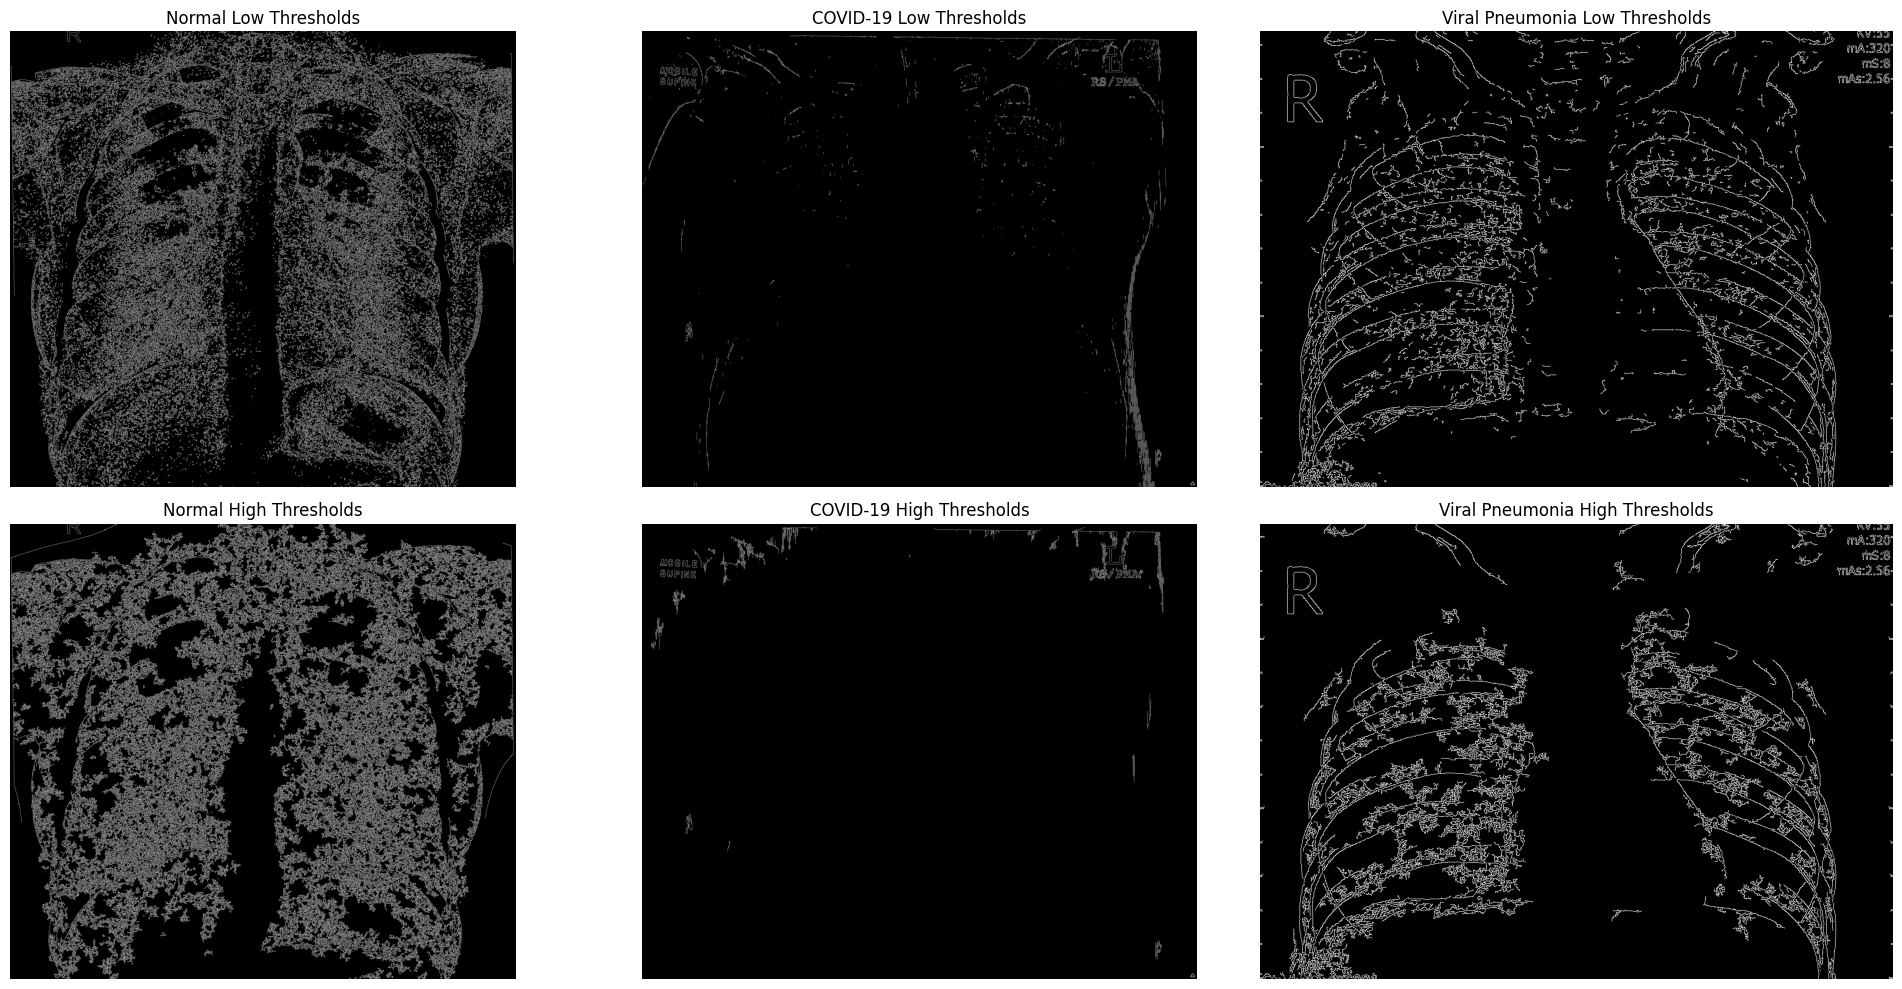

In [9]:
# Convert images to grayscale (original imgaes)
imgCovidGray = cv.cvtColor(imgCovid, cv.COLOR_BGR2GRAY)
imgHealthyGray = cv.cvtColor(imgHealthy, cv.COLOR_BGR2GRAY)
imgViralPneumoniaGray = cv.cvtColor(imgViralPneumonia, cv.COLOR_BGR2GRAY)

# Test 1: Lower Thresholds
imgCovidCannyLow = cv.Canny(imgCovidGray, 50, 100)
imgHealthyCannyLow = cv.Canny(imgHealthyGray, 50, 100)
imgViralPneumoniaCannyLow = cv.Canny(imgViralPneumoniaGray, 50, 100)

# Test 2: Higher Thresholds
imgCovidCannyHigh = cv.Canny(imgCovidGray, 25, 150)
imgHealthyCannyHigh = cv.Canny(imgHealthyGray, 25, 150)
imgViralPneumoniaCannyHigh = cv.Canny(imgViralPneumoniaGray, 25, 150)

# Display images to compare the effects of different thresholds
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(imgHealthyCannyLow, cmap="gray")
plt.title("Normal Low Thresholds")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(imgCovidCannyLow, cmap="gray")
plt.title("COVID-19 Low Thresholds")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(imgViralPneumoniaCannyLow, cmap="gray")
plt.title("Viral Pneumonia Low Thresholds")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(imgHealthyCannyHigh, cmap="gray")
plt.title("Normal High Thresholds")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(imgCovidCannyHigh, cmap="gray")
plt.title("COVID-19 High Thresholds")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(imgViralPneumoniaCannyHigh, cmap="gray")
plt.title("Viral Pneumonia High Thresholds")
plt.axis("off")

plt.tight_layout()
plt.show()



## **Laplacian Edge Detection Filter**

### Explicación
El filtro Laplaciano es un operador de detección de bordes que calcula la segunda derivada de la imagen, lo que permite destacar regiones donde la intensidad de la imagen cambia bruscamente. A diferencia del filtro Sobel, que calcula la primera derivada en direcciones específicas, el Laplaciano utiliza una sola máscara y es isotrópico, lo que significa que detecta bordes igualmente en todas las direcciones.

### Importancia del Parámetro `ksize`
El parámetro `ksize` en el filtro Laplaciano define el tamaño del kernel utilizado para realizar la operación de convolución. El tamaño del kernel afecta la escala y la sensibilidad del filtro a los bordes:

- **ksize pequeño (e.g., 1 o 3):** Con un kernel pequeño, el filtro es más sensible a los bordes pequeños y a los detalles finos, pero también puede ser más susceptible al ruido.
- **ksize grande (e.g., 5 o mayor):** Un kernel más grande hace que el filtro sea menos sensible a los detalles pequeños y más robusto frente al ruido, capturando bordes más prominentes y suaves.

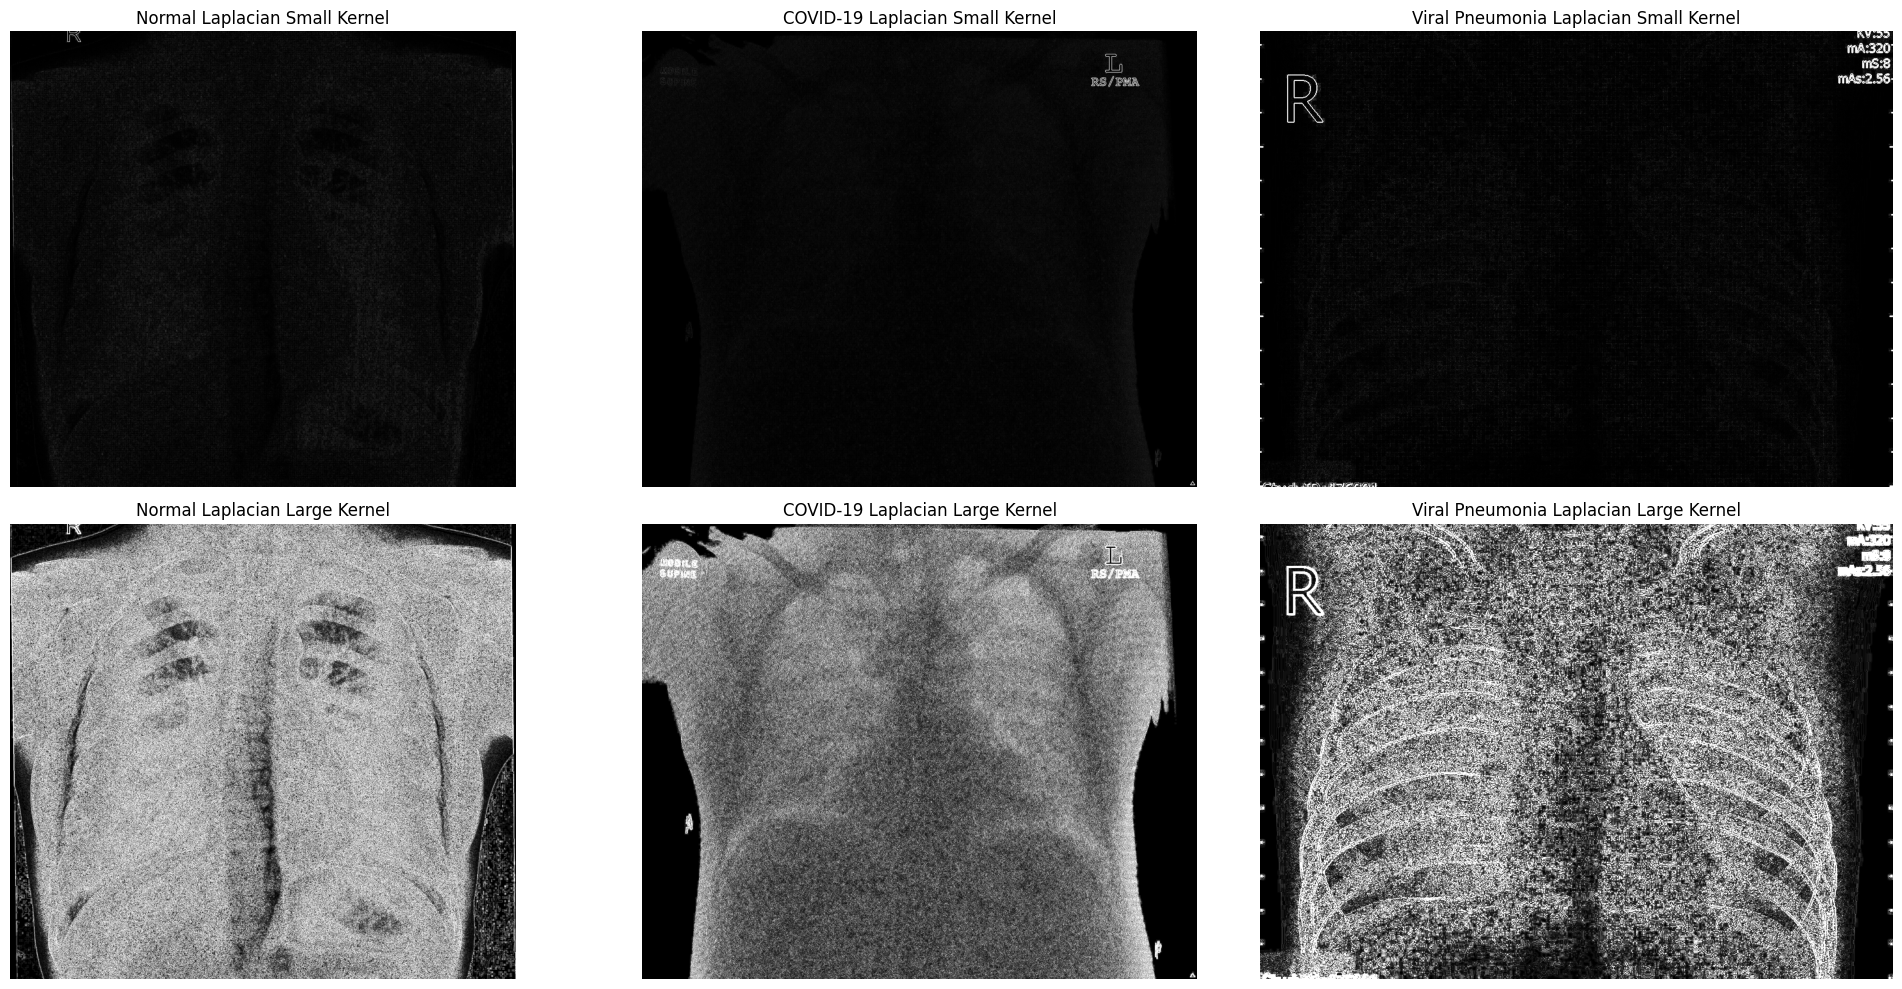

In [10]:

# Apply Laplacian Edge Detection with a small kernel
imgCovidLaplacianSmall = cv.Laplacian(imgCovidGray, cv.CV_64F, ksize=1)
imgHealthyLaplacianSmall = cv.Laplacian(imgHealthyGray, cv.CV_64F, ksize=1)
imgViralPneumoniaLaplacianSmall = cv.Laplacian(imgViralPneumoniaGray, cv.CV_64F, ksize=1)

# Convert scale to 8-bit
imgCovidLaplacianSmall = cv.convertScaleAbs(imgCovidLaplacianSmall)
imgHealthyLaplacianSmall = cv.convertScaleAbs(imgHealthyLaplacianSmall)
imgViralPneumoniaLaplacianSmall = cv.convertScaleAbs(imgViralPneumoniaLaplacianSmall)

# Apply Laplacian Edge Detection with a large kernel
imgCovidLaplacianLarge = cv.Laplacian(imgCovidGray, cv.CV_64F, ksize=5)
imgHealthyLaplacianLarge = cv.Laplacian(imgHealthyGray, cv.CV_64F, ksize=5)
imgViralPneumoniaLaplacianLarge = cv.Laplacian(imgViralPneumoniaGray, cv.CV_64F, ksize=5)

# Convert scale to 8-bit
imgCovidLaplacianLarge = cv.convertScaleAbs(imgCovidLaplacianLarge)
imgHealthyLaplacianLarge = cv.convertScaleAbs(imgHealthyLaplacianLarge)
imgViralPneumoniaLaplacianLarge = cv.convertScaleAbs(imgViralPneumoniaLaplacianLarge)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(imgHealthyLaplacianSmall, cmap="gray")
plt.title("Normal Laplacian Small Kernel")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(imgCovidLaplacianSmall, cmap="gray")
plt.title("COVID-19 Laplacian Small Kernel")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(imgViralPneumoniaLaplacianSmall, cmap="gray")
plt.title("Viral Pneumonia Laplacian Small Kernel")
plt.axis("off")


plt.subplot(2, 3, 4)
plt.imshow(imgHealthyLaplacianLarge, cmap="gray")
plt.title("Normal Laplacian Large Kernel")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(imgCovidLaplacianLarge, cmap="gray")
plt.title("COVID-19 Laplacian Large Kernel")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(imgViralPneumoniaLaplacianLarge, cmap="gray")
plt.title("Viral Pneumonia Laplacian Large Kernel")
plt.axis("off")

plt.tight_layout()
plt.show()

